# Ադամանդի գնի կանխատեսում / Diamond Price Prediction

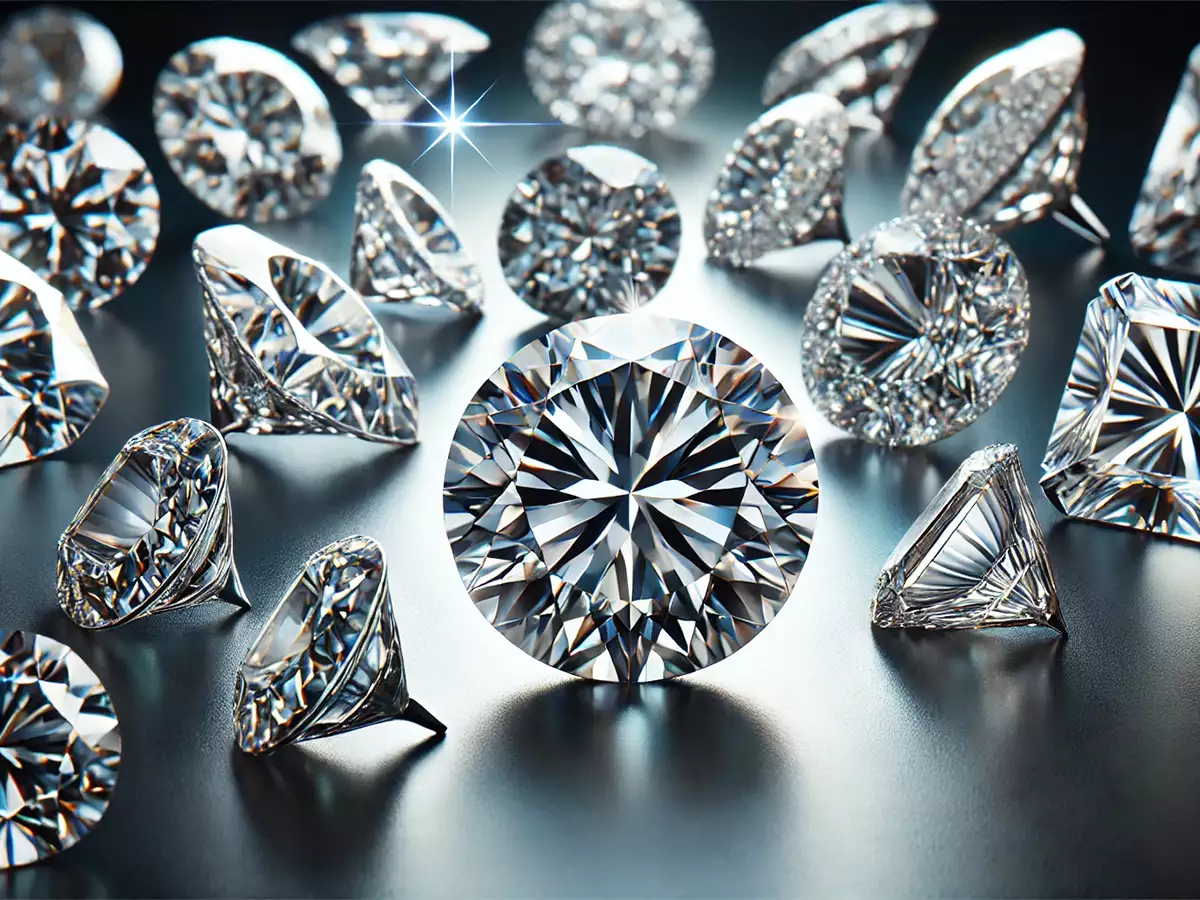

# Ներմուծենք անհրաժեշտ գրադարանները

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

## Բեռնենք տվյալների բազան

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename)

df.head()

Saving diamonds.csv.zip to diamonds.csv.zip


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Տվյալների վերլուծություն

In [ ]:
df.describe()


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.shape

(53940, 10)

In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
df.isna().sum()*100/df.shape[0]

,0
carat,0.0
cut,0.0
color,0.0
clarity,0.0
depth,0.0
table,0.0
price,0.0
x,0.0
y,0.0
z,0.0


### Հեռացնենք կրկնվող տվյալները

In [ ]:
count=len(df[df.duplicated()])
if count>0:
    print('Duplicate Data Count:',count)
    df.drop_duplicates(inplace=True)
    print('Dropped!')

Duplicate Data Count: 146
Dropped!


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
X = df.drop(columns='price',axis=1)
y = df['price']

## Բաժանենք տվյալների բազան train - ի, test - ի

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.2 MB/s eta 0:00:00


## Փախարինենք կատեգորիկ հատկանիշները թվայինով

In [ ]:
from category_encoders.target_encoder import TargetEncoder

encoder = TargetEncoder()
columns = ['cut','color','clarity']
for column in columns:
    X_train[column] = encoder.fit_transform(X = X_train[column], y = y_train)
    X_test[column] = encoder.fit_transform(X = X_test[column], y = y_test)

In [ ]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
33544,0.35,3464.493229,3158.550580,3935.510086,62.0,55.0,4.47,4.53,2.79
26752,2.21,3464.493229,3158.550580,5109.111614,62.0,57.0,8.36,8.31,5.18
45914,0.53,3464.493229,3073.674713,3935.510086,60.0,57.0,5.24,5.30,3.16
3071,0.80,4609.010375,3158.550580,4004.509781,61.7,58.0,5.96,5.93,3.67
43829,0.41,3464.493229,3073.674713,2500.654164,61.5,56.0,4.81,4.82,2.96


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

## Linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

## Ստեղծենք  գծագրեր՝ իրական արժեքները (y_train և y_test) համեմատելու համար կանխատեսված արժեքների հետ (train_pred և test_pred):

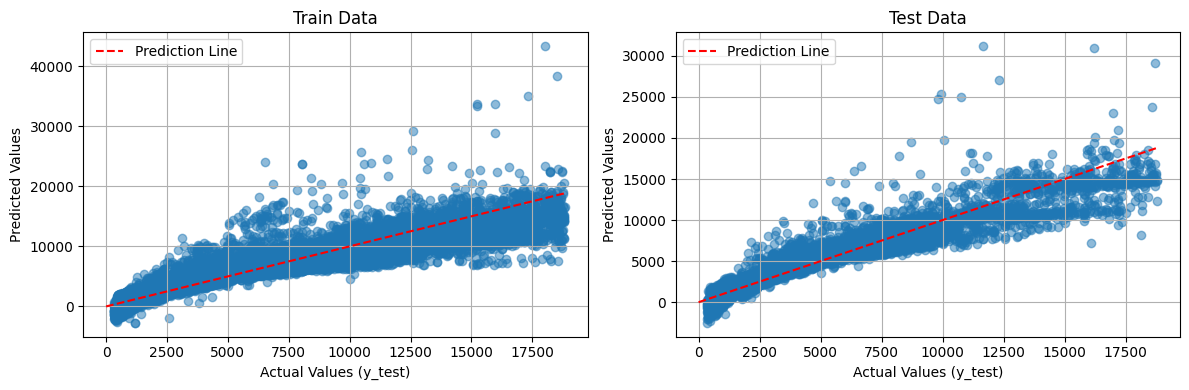

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].scatter(y_train, train_pred, alpha=0.5)
axes[0].plot(np.linspace(0, np.max(y_train), 100), np.linspace(0, np.max(y_train), 100), '--', color='red', label='Prediction Line')
axes[0].set_title('Train Data')
axes[0].set_xlabel('Actual Values (y_test)')
axes[0].set_ylabel('Predicted Values')
axes[0].legend()
axes[0].grid(True)

axes[1].scatter(y_test, test_pred, alpha=0.5)
axes[1].plot(np.linspace(0, np.max(y_test), 100), np.linspace(0, np.max(y_test), 100), '--', color='red', label='Prediction Line')
axes[1].set_title('Test Data')
axes[1].set_xlabel('Actual Values (y_test)')
axes[1].set_ylabel('Predicted Values')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Յուրաքանչյուր հատկանիշի կարևորությունն ու ազդեցությունը կանխատեսումների վրա

In [ ]:
coefficients = model.coef_
column_names = X_train.columns
coefficients_df = pd.DataFrame({'Column Name': column_names, 'Coefficient': coefficients})
coefficients_df

,Column Name,Coefficient
0,carat,5193.018869
1,cut,-41.468783
2,color,-519.306602
3,clarity,-682.727051
4,depth,-226.377247
5,table,-149.386299
6,x,-1196.361365
7,y,25.586604
8,z,74.628108


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import both mean_squared_error and mean_absolute_error

print("::---------Train Data---------::")
mse = mean_squared_error(y_train,train_pred)
print('Mean Squared Error:',mse)
print('*'*50)
print("::---------Test Data---------::")
mse = mean_absolute_error(y_test,test_pred) # Use mean_absolute_error here for MAE
print('Mean Absolute Error:',mse) # Also change the print statement to reflect the correct metric
print('*'*50)

::---------Train Data---------::
Mean Squared Error: 1682203.828466513
**************************************************
::---------Test Data---------::
Mean Absolute Error: 809.4367635279924
**************************************************


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Model
Random_Forest = RandomForestRegressor(n_estimators = 42,random_state =42)
Random_Forest.fit(x_train,y_train)
rf_pred = Random_Forest.predict(x_test)
MSE = mean_squared_error(y_test,rf_pred)
r2 = r2_score(y_test, rf_pred)
MSE,r2